In [96]:
#importing the libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
sns.set(style='ticks')
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

It was informed by the data provider that NaN, NONE values were registred as '...' so we will replace them with NaN.

In [97]:
#Getting the data
dados = pd.read_csv("dataset\Movimento_medio_transporte_RJ.csv",na_values=['...'])

In [98]:
#First look at the data
dados.head()

,Ano,Rodoviário - Ônibus,Ferroviário - Metrô,Ferroviário - Trem,Ferroviário - Bonde,Hidroviário,Aeroviário
0,1995,"3,292.15",323.00,265.61,0.30,71.13,18.15
1,1996,"3,261.48",352.00,222.60,0.17,73.50,19.15
2,1997,"3,222.03",269.00,157.87,0.40,72.70,22.51
3,1998,"3,242.21",358.10,130.01,0.45,66.78,25.43
4,1999,"2,968.42",398.83,175.40,0.76,67.29,25.79


In [99]:
dados.columns

Index(['Ano', 'Rodoviário - Ônibus', 'Ferroviário - Metrô',
       'Ferroviário - Trem ', 'Ferroviário - Bonde', 'Hidroviário ',
       'Aeroviário'],
      dtype='object')

Lets translate the columns name.

In [100]:
dados.rename(columns={'Ano':'Year', 'Rodoviário - Ônibus':"Bus", 'Ferroviário - Metrô':"Metro",
       'Ferroviário - Trem ':"Train", 'Ferroviário - Bonde':'Tram', 'Hidroviário ':'Water',
       'Aeroviário':'Air'}, inplace=True)  

In [101]:
dados.columns

Index(['Year', 'Bus', 'Metro', 'Train', 'Tram', 'Water', 'Air'], dtype='object')

In [102]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    25 non-null     int64  
 1   Bus     25 non-null     object 
 2   Metro   25 non-null     float64
 3   Train   25 non-null     float64
 4   Tram    22 non-null     float64
 5   Water   25 non-null     float64
 6   Air     25 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.5+ KB


As the data was saved in a .xlsx originally, values over 1000 were saved as 1,000. We need to get rid of the ',' and convert the str to float

In [103]:
dados['Bus'] = dados['Bus'].str.replace(r',', '')
dados['Bus'] = dados['Bus'].astype(float)

We will create new columns for the sum of the daily means of each category and for the relative % of usage of each transportation.

In [104]:
#total
dados['Total']= dados.iloc[:,1:].sum(axis=1)
#relative %
dados['% Bus']= dados['Bus']/dados['Total']
dados['% Metro']= dados['Metro']/dados['Total']
dados['% Train']= dados['Train']/dados['Total']
dados['% Tram']= dados['Tram']/dados['Total']
dados['% Water']= dados['Water']/dados['Total']
dados['% Air']= dados['Air']/dados['Total']

In [105]:
dados.describe()

,Year,Bus,Metro,Train,Tram,Water,Air,Total,% Bus,% Metro,% Train,% Tram,% Water,% Air
count,25.000000,25.000000,25.000000,25.000000,22.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,22.000000,25.000000,25.000000
mean,2007.000000,2818.236400,567.384000,387.929200,1.115455,73.228000,45.297200,3893.056400,0.727761,0.144184,0.097500,0.000325,0.018924,0.011345
std,7.359801,499.433155,200.702471,173.760962,0.673829,18.482564,20.327795,738.355322,0.068020,0.034634,0.033534,0.000235,0.003400,0.003663
min,1995.000000,2112.150000,269.000000,130.010000,0.170000,52.780000,18.150000,2934.840000,0.654267,0.071839,0.034008,0.000043,0.011456,0.004571
25%,2001.000000,2303.370000,415.370000,239.110000,0.692500,58.970000,28.270000,3347.950000,0.665552,0.123921,0.066899,0.000144,0.018386,0.008892
50%,2007.000000,2789.170000,537.650000,325.480000,0.850000,67.400000,37.390000,3744.510000,0.705006,0.156576,0.103738,0.000228,0.018808,0.011713
75%,2013.000000,3261.480000,687.460000,528.330000,1.630000,73.860000,66.760000,4559.240000,0.779229,0.164516,0.124067,0.000496,0.020144,0.014668
max,2019.000000,3633.090000,942.390000,661.220000,2.610000,108.390000,75.110000,5306.660000,0.860468,0.209535,0.144525,0.000881,0.027506,0.016672


The data describes the daily mean of x1000 passengers of public transportation per category for each year from 1995 to 2019. The most popular Mean of transportation in Rio de Janeiro seems to be the Bus, followed by Metro and Train and least popular is the Tram.

In [106]:
total = dados.isnull().sum().sort_values(ascending=False)
percent_1 = dados.isnull().sum()/dados.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
% Tram,3,12.0
Tram,3,12.0
% Air,0,0.0
% Water,0,0.0
% Train,0,0.0


The missing data refers to the 3 years the Tram line of Santa Teresa was not operating after an accident in 2011.

Lets take a look at the trends for each category.

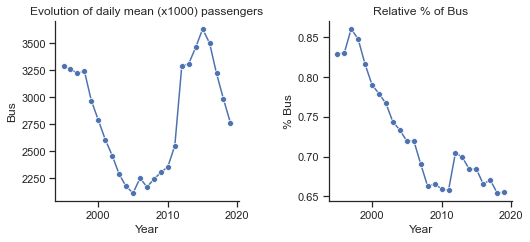

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
sns.lineplot(x="Year", y="Bus", data=dados,marker="o", ax=ax1)
sns.despine()
ax1.set_title('Evolution of daily mean (x1000) passengers')
sns.lineplot(x="Year", y="% Bus", data=dados,marker="o", ax=ax2)
sns.despine()
ax2.set_title('Relative % of Bus')
plt.tight_layout(pad=3.0)
plt.show()

The relative use of Bus dropped through the year, after 2000 there was a huge drop in usage of buses, maybe because in 2000 started the modal integration between the metro and the train. After 2010 it spiked again to return to the daily mean comparable to before 2000. The relative usage kept dropping.

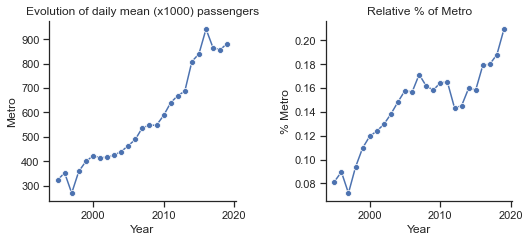

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
sns.lineplot(x="Year", y="Metro", data=dados,marker="o", ax=ax1)
sns.despine()
ax1.set_title('Evolution of daily mean (x1000) passengers')
sns.lineplot(x="Year", y="% Metro", data=dados,marker="o", ax=ax2)
sns.despine()
ax2.set_title('Relative % of Metro')
plt.tight_layout(pad=3.0)
plt.show()

The Metro is the second most popular transportation between the cariocas, citizens of Rio de Janeiro, and its popularity kept rising between 1995 and 2019. There was a small drop in 2011.

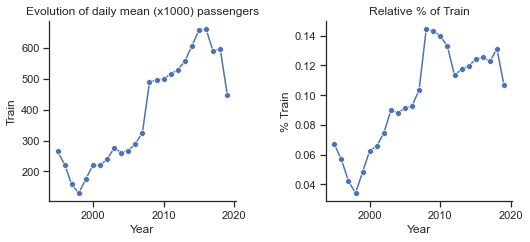

In [109]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
sns.lineplot(x="Year", y="Train", data=dados,marker="o", ax=ax1)
sns.despine()
ax1.set_title('Evolution of daily mean (x1000) passengers')
sns.lineplot(x="Year", y="% Train", data=dados,marker="o", ax=ax2)
sns.despine()
ax2.set_title('Relative % of Train')
plt.tight_layout(pad=3.0)
plt.show()

The train is the third most popular transporatation in the city of Rio de Janeiro, the general trend is for growth but in these 25 years its popularity dropped 2 times, in 1995 and in 2009, and it seems there is another drop in popularity in 2019.

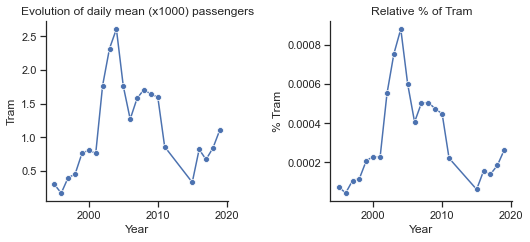

In [110]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
sns.lineplot(x="Year", y="Tram", data=dados,marker="o", ax=ax1)
sns.despine()
ax1.set_title('Evolution of daily mean (x1000) passengers')
sns.lineplot(x="Year", y="% Tram", data=dados,marker="o", ax=ax2)
sns.despine()
ax2.set_title('Relative % of Tram')
plt.tight_layout(pad=3.0)
plt.show()

The tram had a big spike after 2000's just to drop after that.

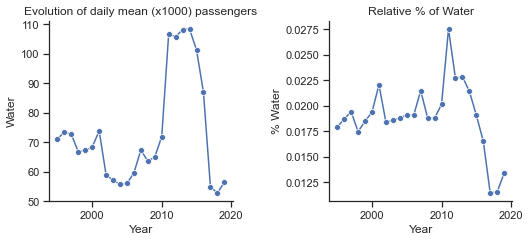

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
sns.lineplot(x="Year", y="Water", data=dados,marker="o", ax=ax1)
sns.despine()
ax1.set_title('Evolution of daily mean (x1000) passengers')
sns.lineplot(x="Year", y="% Water", data=dados,marker="o", ax=ax2)
sns.despine()
ax2.set_title('Relative % of Water')
plt.tight_layout(pad=3.0)
plt.show()

The daily mean of passengers using waterbourne transportation did not vary a lot between 1995 and 2010, after that the daily mean of passengers almost doubled after 2015 dropped again.

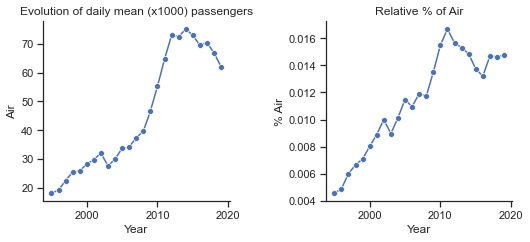

In [112]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
sns.lineplot(x="Year", y="Air", data=dados,marker="o", ax=ax1)
sns.despine()
ax1.set_title('Evolution of daily mean (x1000) passengers')
sns.lineplot(x="Year", y="% Air", data=dados,marker="o", ax=ax2)
sns.despine()
ax2.set_title('Relative % of Air')
plt.tight_layout(pad=3.0)
plt.show()

The daily mean of Air transport grew almost x4 times.

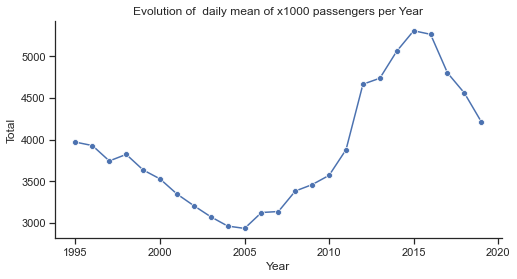

In [113]:
plt.figure(figsize=(8, 4))
sns.lineplot(x="Year", y="Total",marker="o", data=dados)
sns.despine()
plt.title('Evolution of  daily mean of x1000 passengers per Year')
plt.show()

Between 1995 and 2005 the daily mean of passengers using the public transportation diminished, and after 2005 the daily mean of passengers grew steadly, after 2015 started do drop again.

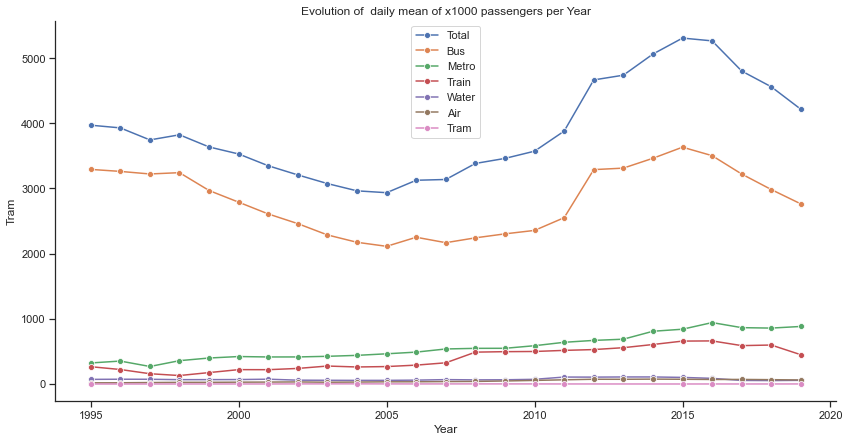

In [114]:
plt.figure(figsize=(14, 7))
sns.lineplot(x="Year", y="Total",label="Total",marker="o", data=dados)
sns.lineplot(x="Year", y="Bus", label="Bus",marker="o", data=dados)
sns.lineplot(x="Year", y="Metro",label="Metro",marker="o", data=dados)
sns.lineplot(x="Year", y="Train",label="Train",marker="o", data=dados)
sns.lineplot(x="Year", y="Water",label="Water",marker="o", data=dados)
sns.lineplot(x="Year", y="Air",label="Air",marker="o", data=dados)
sns.lineplot(x="Year", y="Tram",label="Tram",marker="o", data=dados)
sns.despine()
plt.title('Evolution of  daily mean of x1000 passengers per Year')
plt.show()

With the information analysed in this exploration, if we want to discover why there was such a drop in bus and total usage of public transportation between 2000 and 2005, the next step is to look at the events that could cause such drop. Did the price or did a change in the buslines cause the drop? Did the passengers switch to private transportation?  

The metro had the biggest relative growth in these 25 years, but the bus is still the main transportation in the city of Rio de Janeiro.